#  PROSPER LOAN DATA EXPLORATION
## by Gabriel Chidera Edeh

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe and make a copy of it
df = pd.read_csv('prosperLoanData.csv')
loan_data = df.copy()

In [3]:
# overview of the data
print(loan_data.shape)
loan_data.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# overview of the composition of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
# Getting rid of low information variables (i.e, columns with null values > 50%)
for item in loan_data.columns:
    if (loan_data[item].isna().sum()/len(loan_data))*100 > 50:
        loan_data.drop(item,axis=1,inplace=True)
    else:
        pass

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null   float64
 9   EstimatedLoss                       84853 non-null   float64
 10  EstimatedReturn                     84853 non-null   float64
 11  ProsperRating (numeric)   

In [8]:
#converting LoanOriginationDate to datetime
loan_data.LoanOriginationDate = pd.to_datetime(loan_data.LoanOriginationDate)

In [9]:
assert loan_data['LoanOriginationDate'].dtype == '<M8[ns]'

In [10]:
loan_data['LoanOriginationQuarter'].unique()

array(['Q3 2007', 'Q1 2014', 'Q1 2007', 'Q4 2012', 'Q3 2013', 'Q4 2013',
       'Q2 2013', 'Q2 2012', 'Q4 2007', 'Q3 2006', 'Q1 2013', 'Q2 2010',
       'Q1 2012', 'Q3 2012', 'Q4 2010', 'Q4 2011', 'Q3 2008', 'Q2 2007',
       'Q4 2006', 'Q2 2011', 'Q1 2011', 'Q1 2008', 'Q3 2009', 'Q3 2011',
       'Q2 2008', 'Q1 2010', 'Q4 2009', 'Q2 2006', 'Q3 2010', 'Q1 2006',
       'Q4 2008', 'Q4 2005', 'Q2 2009'], dtype=object)

In [11]:
#function for extracting the  year

def year(x):
    return x.split(' ')[1]

#function for extracting the quarter of the year
def quarter(x):
    return x.split(' ')[0]

In [12]:
loan_data['LoanOriginationYear']= loan_data["LoanOriginationQuarter"].apply(year)
loan_data['LoanOriginationQuarter'] = loan_data['LoanOriginationQuarter'].apply(quarter)

In [13]:
#converting ListingCategory to alpha from numeric listing
listingcat = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan", 5 : "Student Use",
 6 : "Auto", 7: "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure",11 : "Engagement Ring", 12 : "Green Loans",
 13 : "Household Expenses",  14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV",
 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}

In [14]:
#function to work on listing category
def listcat(x):
    return listingcat[x]


loan_data["ListingCategory"] = loan_data["ListingCategory (numeric)"].apply(listcat)

In [15]:
#check unique values for categorical columns
for var in loan_data.columns:
    if loan_data[var].dtype == "object":
        print(var,loan_data[var].nunique())
        print("%==========================%")
        print(loan_data[var].unique())
        print("====================================================================================")

ListingKey 113066
%==========================%
['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
ListingCreationDate 113064
%==========================%
['2007-08-26 19:09:29.263000000' '2014-02-27 08:28:07.900000000'
 '2007-01-05 15:00:47.090000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000']
LoanStatus 12
%==========================%
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
ProsperRating (Alpha) 7
%==========================%
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
BorrowerState 51
%==========================%
['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'T

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 71 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  object        
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   BorrowerAPR                         113912 non-null  float64       
 6   BorrowerRate                        113937 non-null  float64       
 7   LenderYield                         113937 non-null  float64       
 8   EstimatedEffectiveYield             84853 non-null   float64       
 9   EstimatedLoss                       84853 non-null   float64       
 10  Estimate

In [17]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [18]:
#drop columns that will not contirbute to the analysis

ColumnsToDrop = ['ListingKey', 'ListingCreationDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'MemberKey'
                ]

In [19]:
loan_data = loan_data.drop(['ListingKey', 'ListingCreationDate', 'DateCreditPulled', 
                            'FirstRecordedCreditLine', 'LoanKey', 'MemberKey', 'ListingNumber'], axis =1)

In [20]:
# drop rows without Prosper rating numeric
loan_data.drop(loan_data[loan_data['ProsperRating (numeric)'].isna()].index,inplace=True)

In [21]:
#lets see if the wrangling effort was successful
assert len(loan_data) == 84853

In [22]:
# Saving the cleaned dataset to a csv file
loan_data.to_csv("cleaned_prosperLoanData.csv", index=False)

### What is the structure of your dataset?

> There are 113937 loan records with 81 features in the dataset. From the above, 84853 records will be considered for this  analysis because of their relevance in determining the amount of loan to be collected and prosper rating. Majority of the variables are numeric while the remaining features are categorical, however the variable 'LoanOriginationDate' is in datetime format after conversion.

### What is/are the main feature(s) of interest in your dataset?

> The main interest in this dataset is to determine how the various numerical and categorical features influences the prosper rating and ability to get loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The various numerical, categorical and datetime variables/features in the dataset will be explored to determine how they relate to the features of interest.

## Univariate Exploration

> The categorical variable of interest are

> cat_var = ['LoanStatus','ProsperRating (Alpha)', 'BorrowerState','EmploymentStatus',
           'IncomeRange','LoanOriginationYear','ListingCategory',
          'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable','Occupation', 'LoanOriginationQuarter']

In [23]:
#lets create a function for plotting of the various categorical variables of interest
def univar_barchart(column,kind,size=None,sort=None):
    if size is None:
        plt.figure(figsize=[15,8])
    else:
        plt.figure(figsize=size)


    # for feature vs record count
    
    if sort == True:
        plt.subplot(1, 2, 1)
        loan_data.groupby(column)["LoanOriginalAmount"].count().sort_values(ascending=False).plot(kind=kind);
        plt.ylabel("record count")
        plt.title(f"{column}  vs record count");

        # for feature vs Average LoanOriginalAmount
        plt.subplot(1, 2, 2)
        loan_data.groupby(column)["LoanOriginalAmount"].mean().sort_values(ascending=False).plot(kind=kind,color="red");
        plt.ylabel("Average LoanOriginalAmount")
        plt.title(f"{column}   vs Average LoanOriginalAmount");
    else:
        plt.subplot(1, 2, 1)
        loan_data.groupby(column)["LoanOriginalAmount"].count().plot(kind=kind);
        plt.ylabel("record count")
        plt.title(f"{column}  vs record count");

        # for feature vs Average LoanOriginalAmount
        plt.subplot(1, 2, 2)
        loan_data.groupby(column)["LoanOriginalAmount"].mean().plot(kind=kind,color="red");
        plt.ylabel("Average LoanOriginalAmount")
        plt.title(f"{column}   vs Average LoanOriginalAmount");

### Loan Status with the highest record count and average loanOriginalAmount

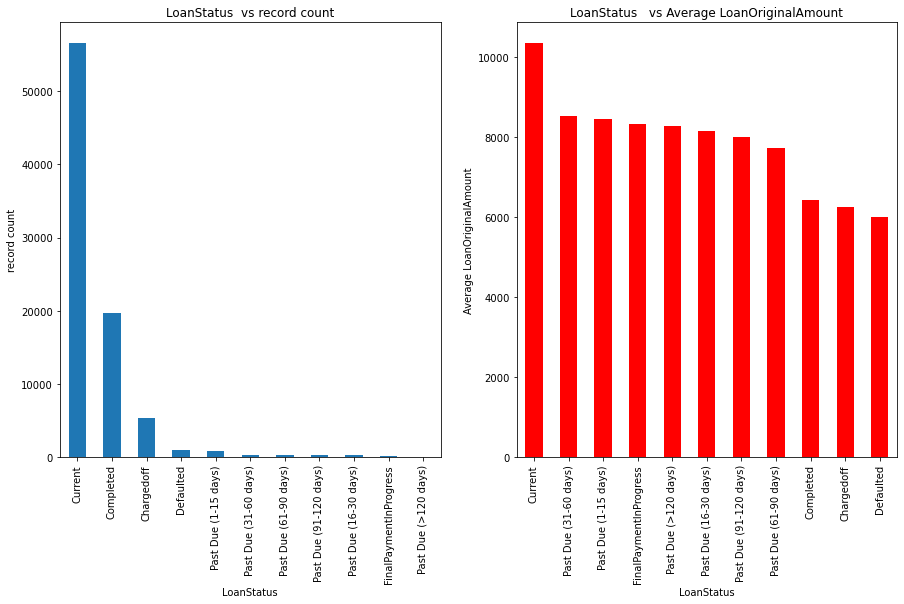

In [24]:
# plotting for loanstatus
univar_barchart("LoanStatus","bar", sort= True)

From the chart above, current LoanStatus recorded the highest loan listing  and the average loan amount requested respectively

### ProsperRating (Alpha) with the highest record count and average loanOriginalAmount

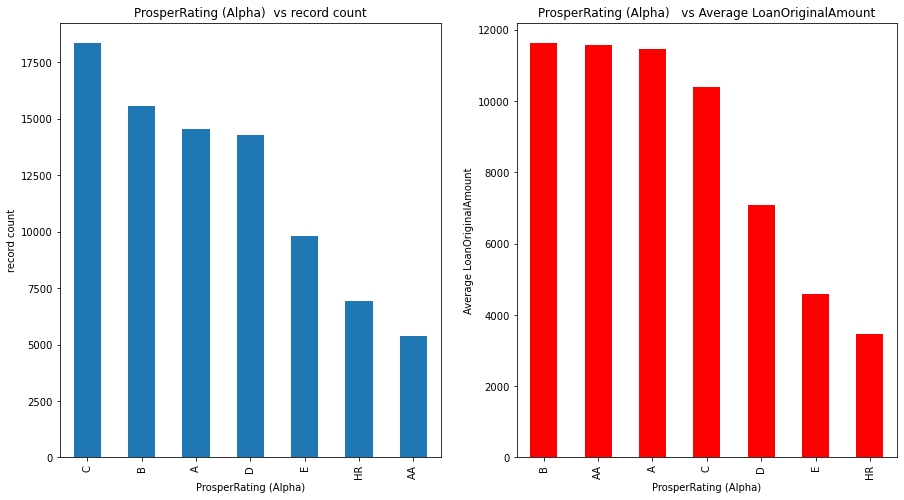

In [25]:
# plotting for ProsperRating (Alpha)
univar_barchart('ProsperRating (Alpha)',"bar", sort = True)

From the chart above, we can see that ProsperRating (Alpha) C  recorded the highest loan listing with ProsperRating (Alpha) B  topping the chart for average loan amount requested for

### BorrowerState with the highest record count and average loanOriginalAmount

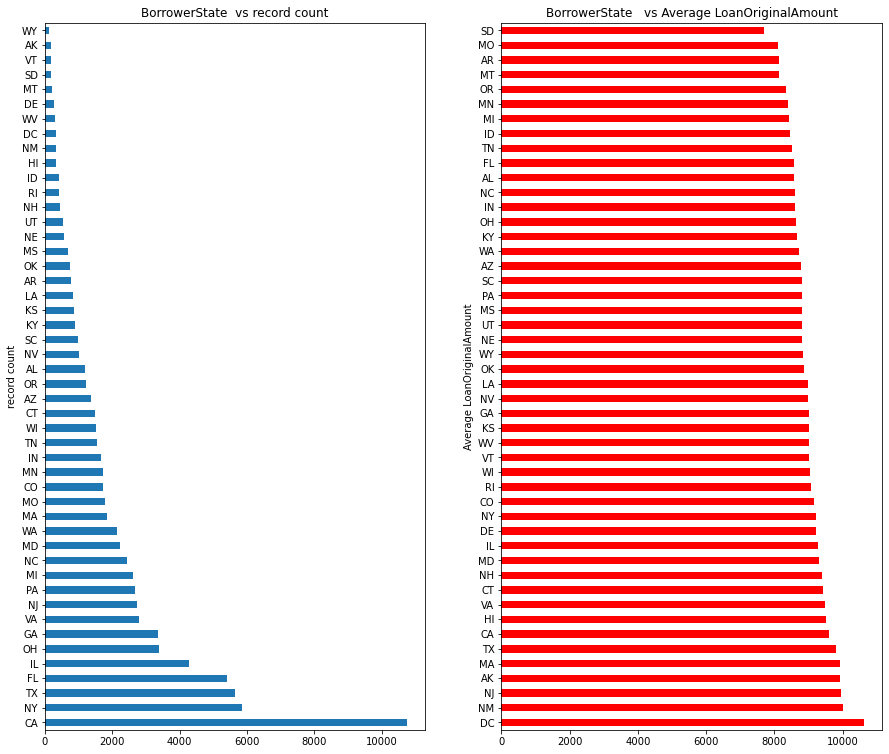

In [26]:
univar_barchart('BorrowerState',"barh",[15,13], sort = True)

majority of the listing are coming from Carlifonia,New York,Texas, Florida with Washington, D.C topping the average loan amount recorded

### EmploymentStatus with the highest record count and average loanOriginalAmount

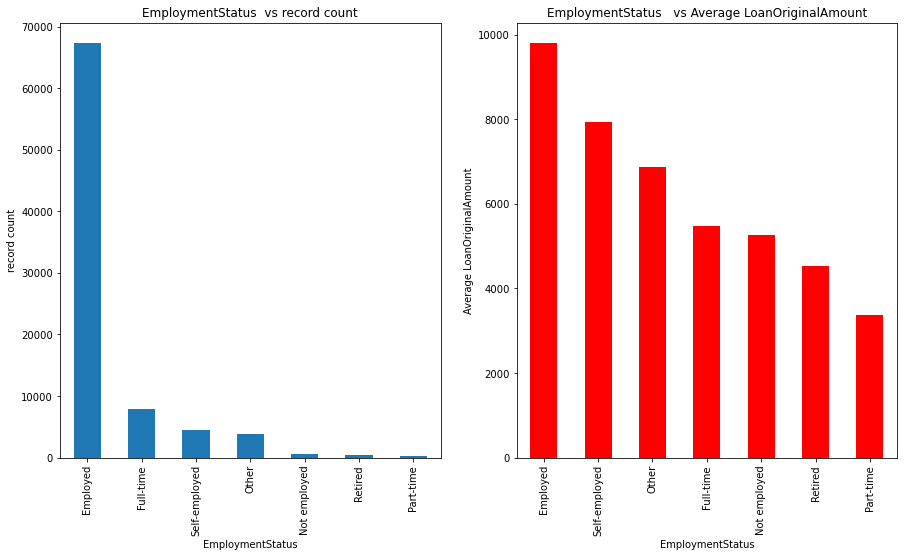

In [27]:
univar_barchart('EmploymentStatus',"bar", sort = True)

Retired, Partime and Not-employed had relatively low number of loan listing compared to employed and full time workers


### IncomeRange with the highest record count and average loanOriginalAmount

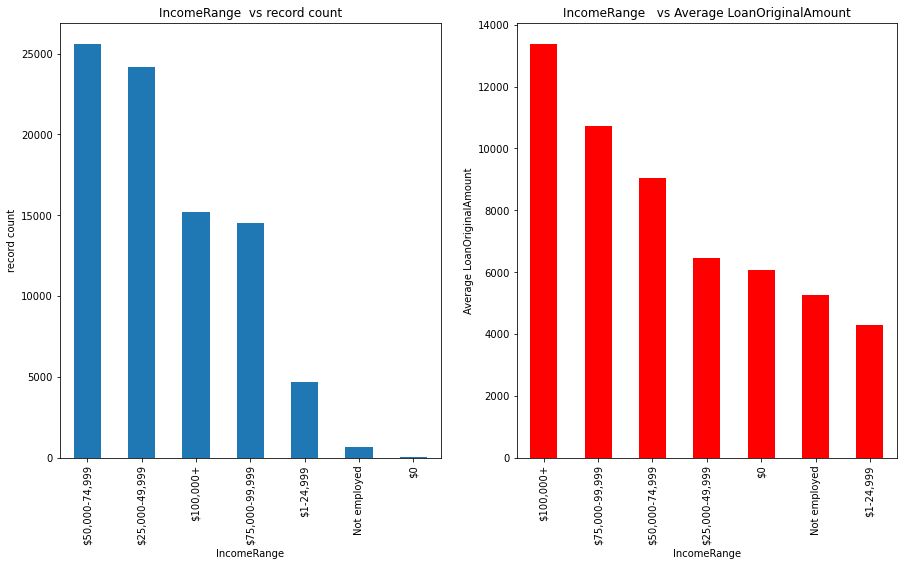

In [28]:
univar_barchart('IncomeRange',"bar", sort = True)

From the chart, high income earners constitute majority in the loan listing with $100,000+ topping the average loan original amount as expected


### LoanOriginationYear with the highest record count and average loanOriginalAmount

None


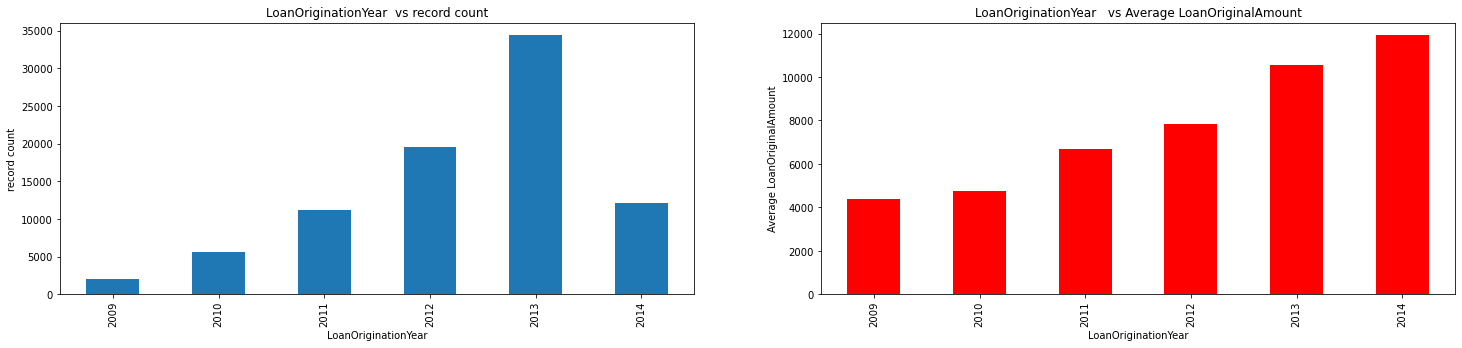

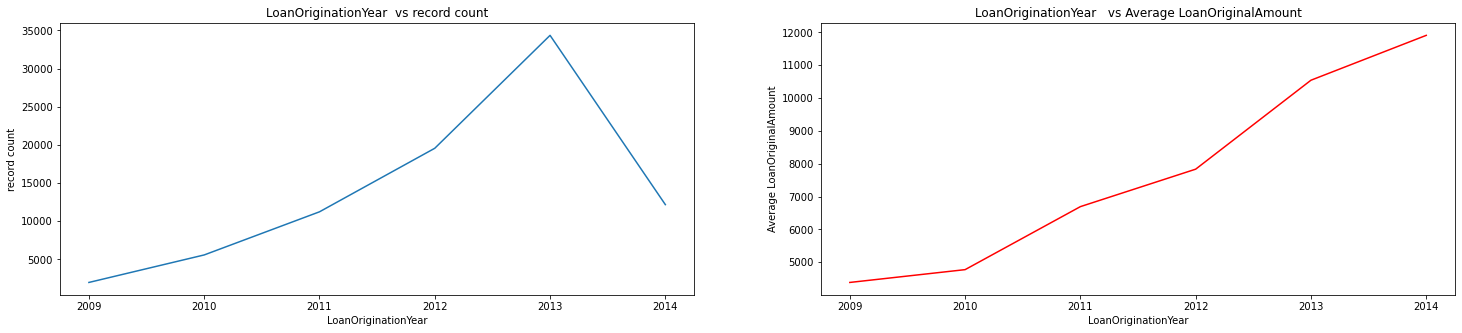

In [29]:
print(univar_barchart('LoanOriginationYear',"bar", [25,5]))
univar_barchart('LoanOriginationYear',"line", [25,5])

> Based on yearly analysis from the chart we can see that 2013 recorded the highest loan listing with 2014 topping the chart for average loan amount requested for.

### ListingCategory with the highest record count and average loanOriginalAmount

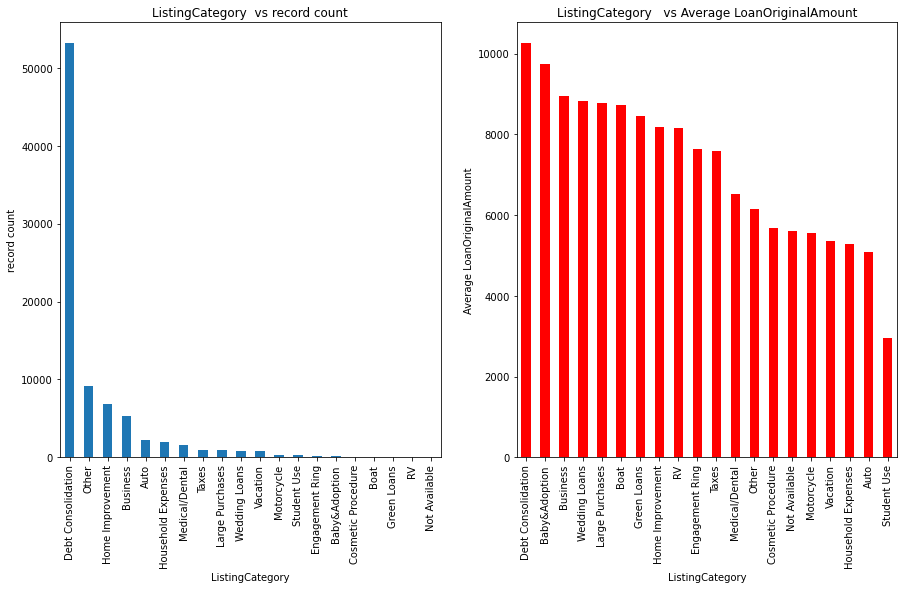

In [30]:
univar_barchart('ListingCategory',"bar", sort = True)

> Majority of the listing and average loan requested for was for debt consolidation.

### IsBorrowerHomeowner with the highest record count and average loanOriginalAmount

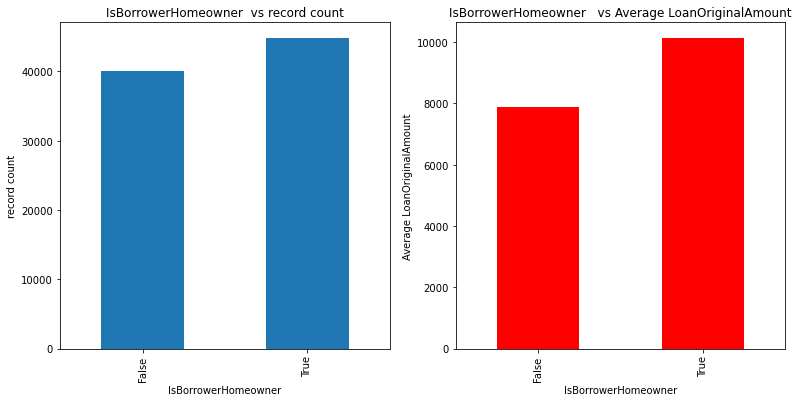

In [31]:
univar_barchart('IsBorrowerHomeowner',"bar", [13,6])

> More than half of the borrower were home owners and this set of people also topped the average loan original amount

### CurrentlyInGroup with the highest record count and average loanOriginalAmount

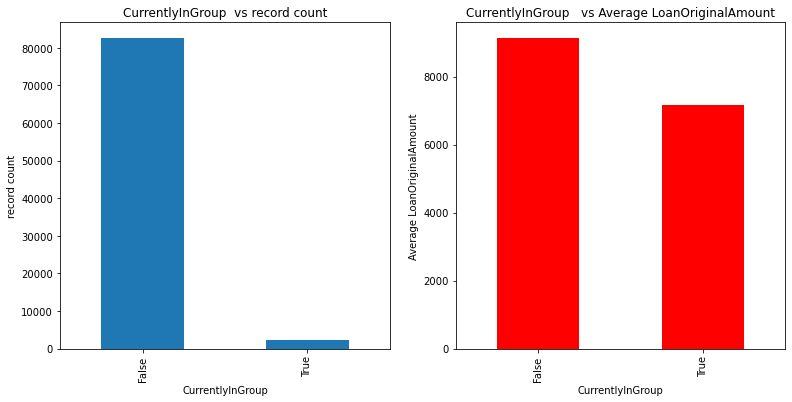

In [32]:
univar_barchart('CurrentlyInGroup',"bar", [13,6])

> A great majority of the listings were not currently in group and this set of people also topped the average loan original amount

### IncomeVerifiable with the highest record count and average loanOriginalAmount

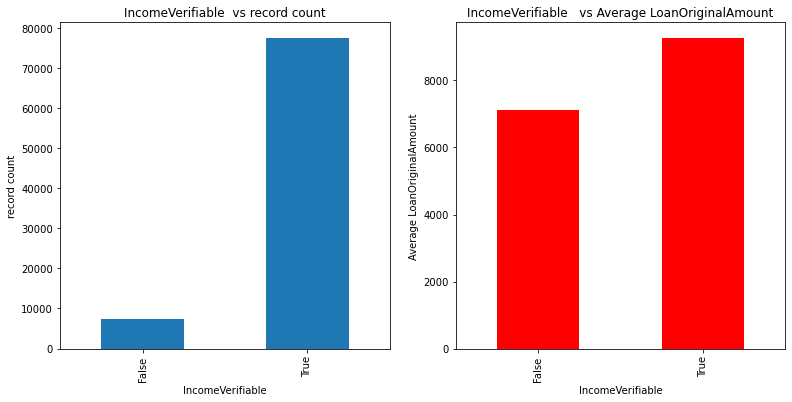

In [33]:
univar_barchart('IncomeVerifiable',"bar", [13,6])

> A great majority have a verifiable income and this set of of people also topped the average loan original amount

### Top Ten (10) Occupation with the highest record count and average loanOriginalAmount

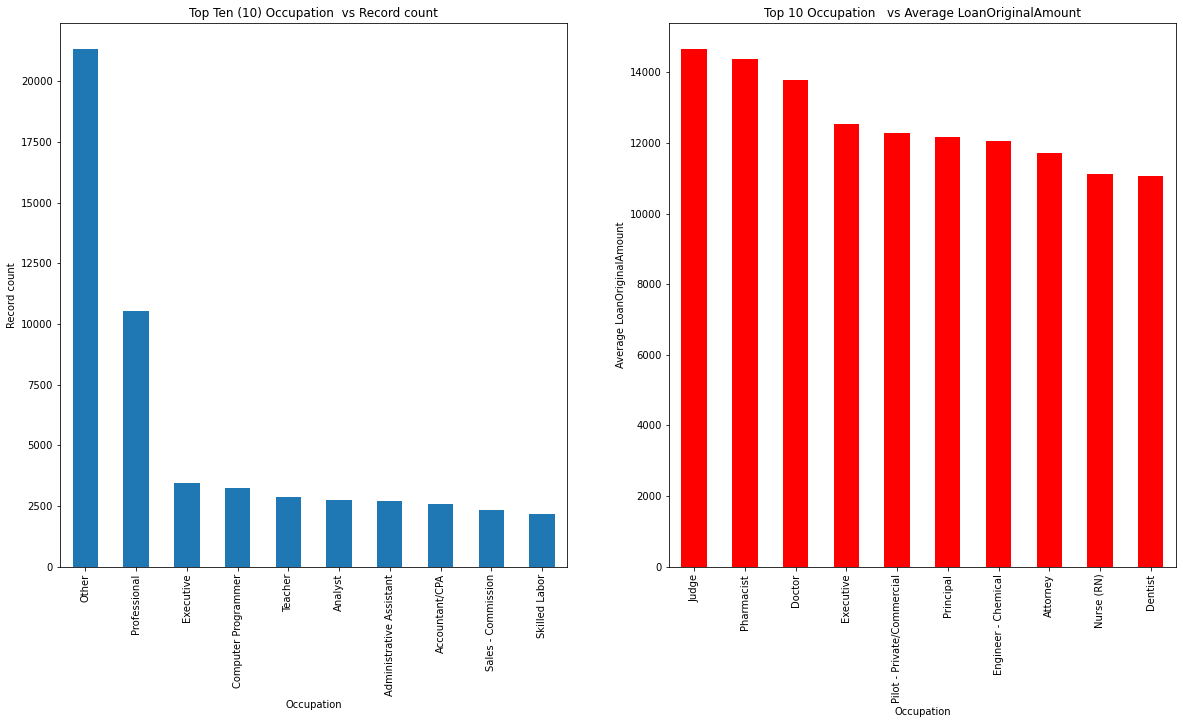

In [34]:
# for Top 10 Occupation

plt.figure(figsize=[20,10])
# for Top 10 occupation vs Record Count
plt.subplot(1, 2, 1)
loan_data.groupby("Occupation")["LoanOriginalAmount"].count().sort_values(ascending=False).head(10).plot(kind="bar");
plt.ylabel("Record count")
plt.title("Top Ten (10) Occupation  vs Record count");

# for Top 10 occupation vs Average LoanOriginalAmount
plt.subplot(1, 2, 2)
loan_data.groupby("Occupation")["LoanOriginalAmount"].mean().sort_values(ascending=False).head(10).plot(kind="bar",color="red");
plt.ylabel("Average LoanOriginalAmount")
plt.title("Top 10 Occupation   vs Average LoanOriginalAmount");

> Majority of the loan listing was associated with professionals with those in the medical fields topping the average loan original amount for this survey

### Bottom Ten (10) Occupation with the lowest record count and average loanOriginalAmount

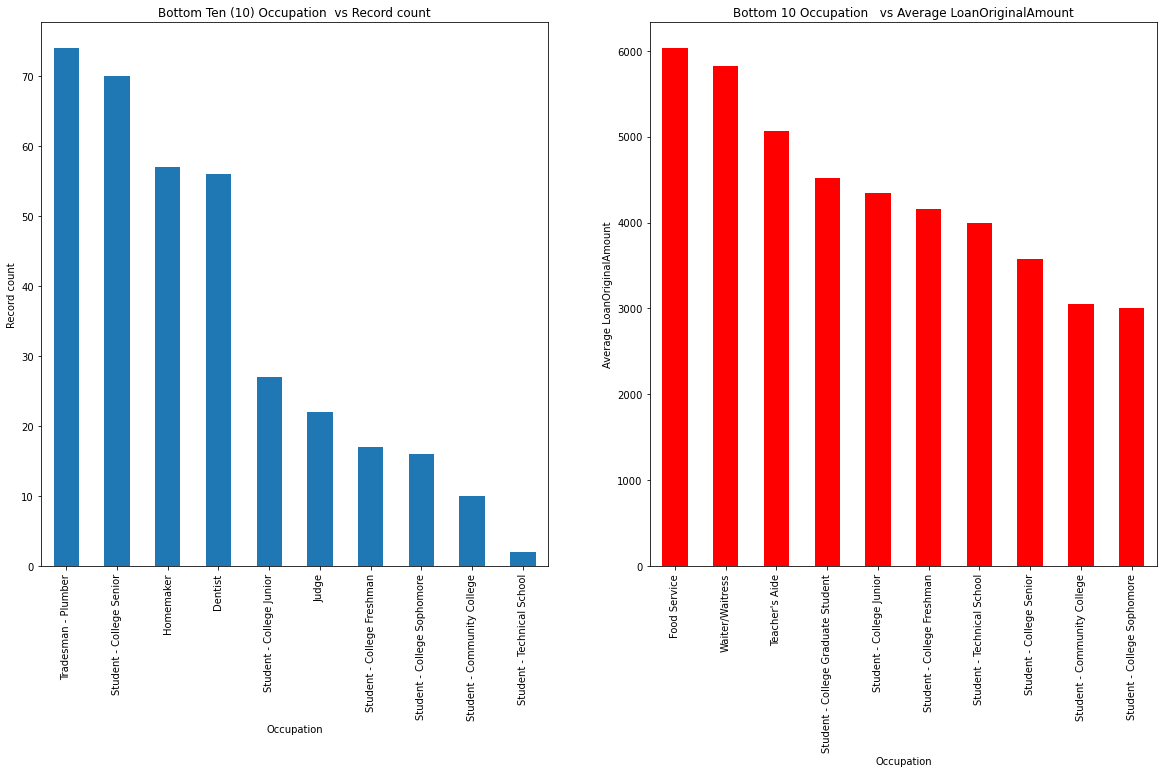

In [35]:
# for Bottom 10 Occupation

plt.figure(figsize=[20,10])
# for Bottom 10 occupation vs Record Count
plt.subplot(1, 2, 1)
loan_data.groupby("Occupation")["LoanOriginalAmount"].count().sort_values(ascending=False).tail(10).plot(kind="bar");
plt.ylabel("Record count")
plt.title("Bottom Ten (10) Occupation  vs Record count");

# for Top 10 occupation vs Average LoanOriginalAmount
plt.subplot(1, 2, 2)
loan_data.groupby("Occupation")["LoanOriginalAmount"].mean().sort_values(ascending=False).tail(10).plot(kind="bar",color="red");
plt.ylabel("Average LoanOriginalAmount")
plt.title("Bottom 10 Occupation   vs Average LoanOriginalAmount");

> Majority of the bottom loan listing were more of students and same applied to the average loan original amount for this survey

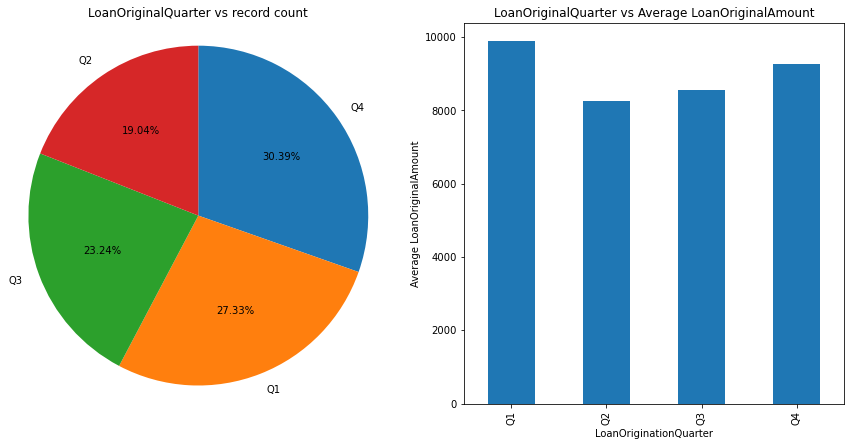

In [36]:
sorted_counts = loan_data.LoanOriginationQuarter.value_counts()
plt.figure(figsize=[15,7])


# plot for LoanOriginalQuarter vs record count
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f%%');
plt.axis('square')
plt.title("LoanOriginalQuarter vs record count");

# for LoanOriginalQuarter vs Average LoanOriginalAmount
plt.subplot(1, 2, 2)
loan_data.groupby("LoanOriginationQuarter")["LoanOriginalAmount"].mean().plot(kind="bar");
plt.ylabel("Average LoanOriginalAmount")
plt.title("LoanOriginalQuarter vs Average LoanOriginalAmount");

> Highest percentage of the loan listing was carried out in the 4th quarter, followed by the 1st quarter and lastly by the 2nd quarter of the year, with the 1st quarter recording the highest average loan amount for the years the survey was carried out

## NUMERICAL VARIABLES OF INTEREST

In [37]:
# histogram plot for the numerical variables of interest

def univar_hist(data,column,binsize):
    
    bins = np.arange(0, data[column].max()+binsize, binsize)
    
    plt.figure(figsize=[15,8])
    plt.hist(data = data, x = column, bins = bins)
    plt.xlabel(column)
    plt.ylabel("record count")
    plt.title(f"{column} distribution")
    plt.show()

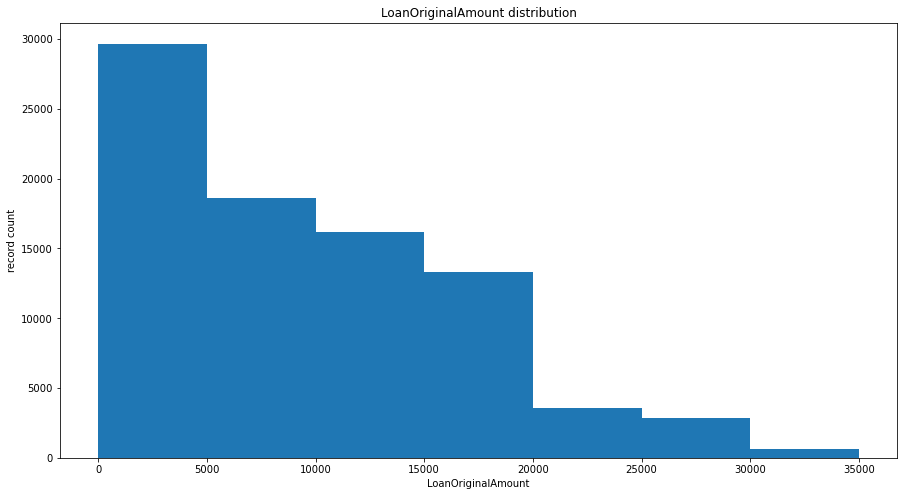

In [38]:
univar_hist(loan_data, 'LoanOriginalAmount',5000)

> LoanOriginalAmount has a right skewed distribution, with a lot of loan listing on the low LoanOriginalAmount end, and few on the high LoanOriginalAmount end.

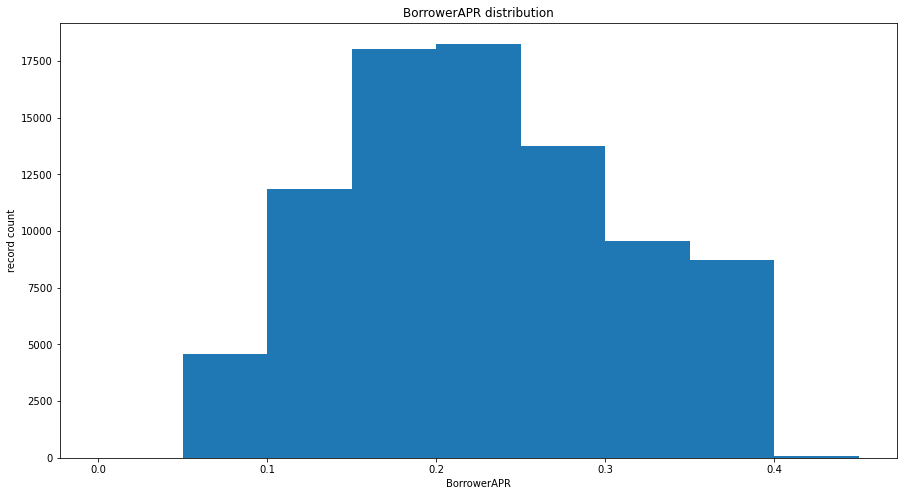

In [39]:
univar_hist(loan_data, 'BorrowerAPR',0.05)

> BorrowerAPR has a right skewed distribution, with a lot of loan listing at the center of this distribution , and few on the high and low BorrowerAPR end

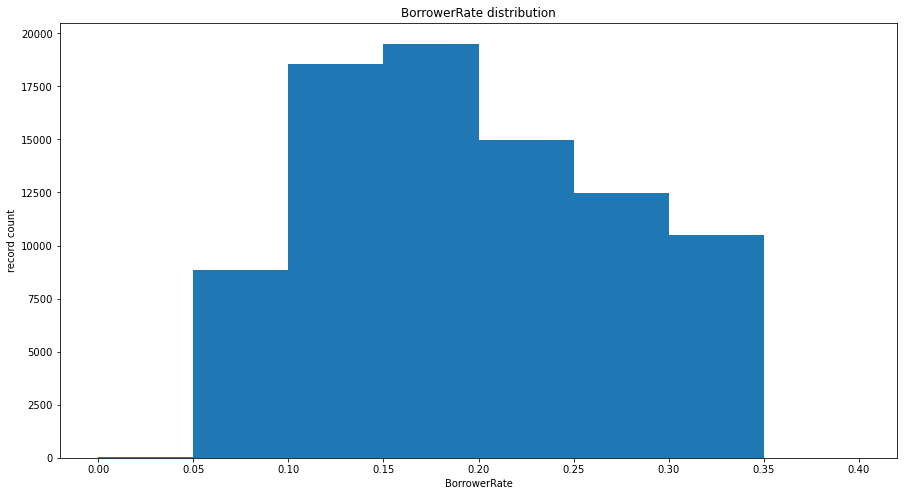

In [40]:
univar_hist(loan_data, 'BorrowerRate',0.05)

> BorrowerRate has a right skewed distribution, with a lot of loan listing at the center of this distribution , and few on the high and low BorrowerRate end.

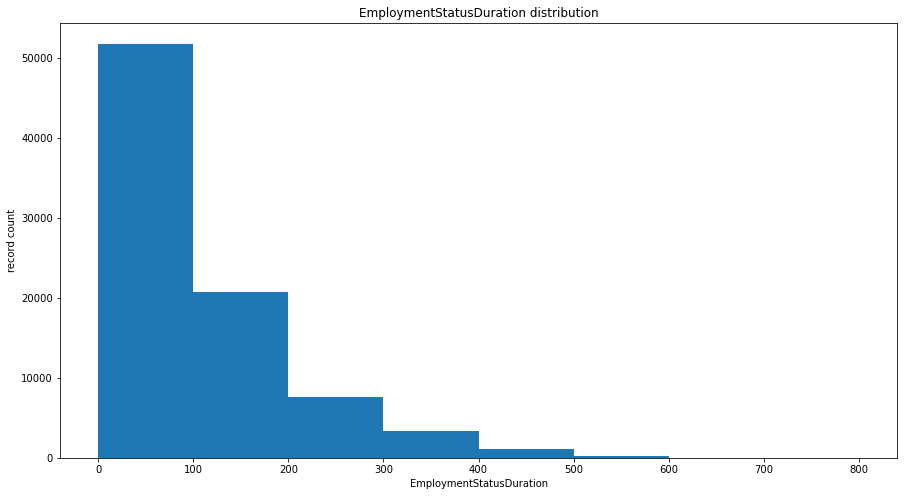

In [41]:
univar_hist(loan_data, 'EmploymentStatusDuration',100)

> EmploymentStatusDuration has a right skewed distribution, with a lot of loan listing on the low EmploymentStatusDuration end, and few on the high EmploymentStatusDuration end.

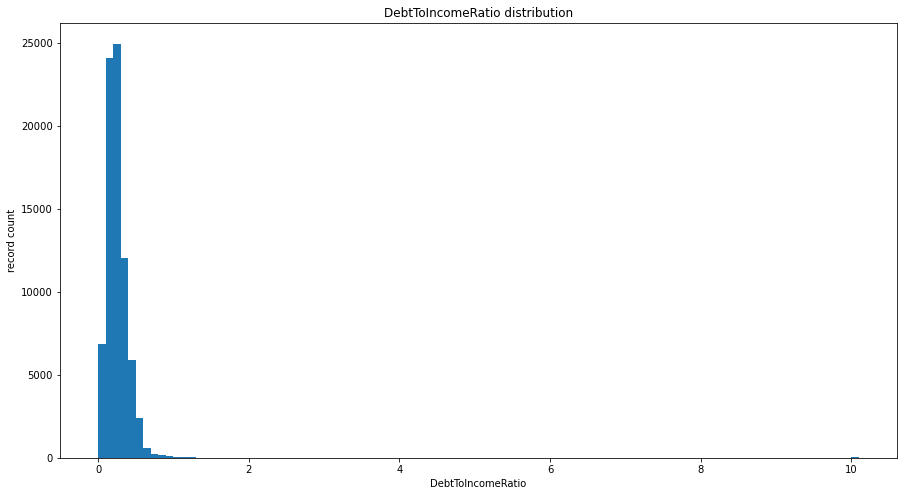

In [42]:
univar_hist(loan_data, 'DebtToIncomeRatio',0.1)

> DebtToIncomeRatio has a right skewed distribution, with a lot of loan listing on the low DebtToIncomeRatio end, and few on the high DebtToIncomeRatio end.

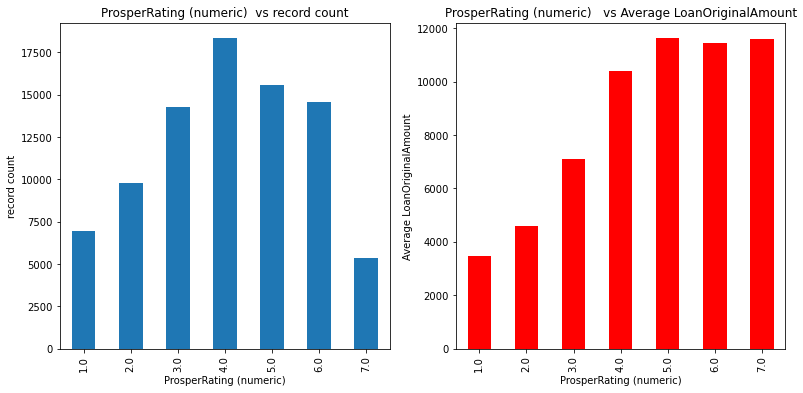

In [43]:
univar_barchart('ProsperRating (numeric)',"bar", [13,6])

> ProsperRating (numeric) has rating no. 4 having the highest recorded loan listing, with ratings no.5 and 7 topping the chart for average LoanOriginalAmount requested for.

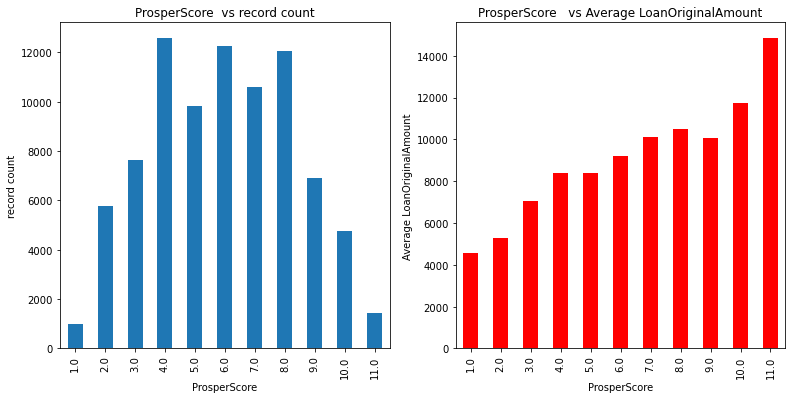

In [44]:
univar_barchart('ProsperScore',"bar", [13,6])

> From the chart above, it can be seen that ProsperScores 4,6 and 8 topped the chart for highest recorded loan listing, while a gradual increase in the average loanOriginalAmount was noted as the ProsperScore increases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> majority of the numerical features skewed to the right in thier distribution, no transformation was carried out at this point

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution was detected. However, separtion of the quarter from the year and also convertion of listingcategory to alpha was carried out to enhance understanding of the dataset and for easy visualization.

## Bivariate Exploration


In [45]:
# Categorical and numerical variables of interest
cat_var = ['LoanStatus',
           'ProsperRating (Alpha)', 
           'BorrowerState',
           'EmploymentStatus',
           'IncomeRange',
           'LoanOriginationYear',
           'ListingCategory',
          'IsBorrowerHomeowner',
           'CurrentlyInGroup',
           'IncomeVerifiable',
           'Occupation', 
           'LoanOriginationQuarter']

num_var = ['LoanOriginalAmount', 
           'BorrowerAPR',
           'BorrowerRate',
           'EmploymentStatusDuration', 
           'DebtToIncomeRatio',
           'ProsperRating (numeric)',
           'ProsperScore',]

#### How are the numerical variables related to one another?

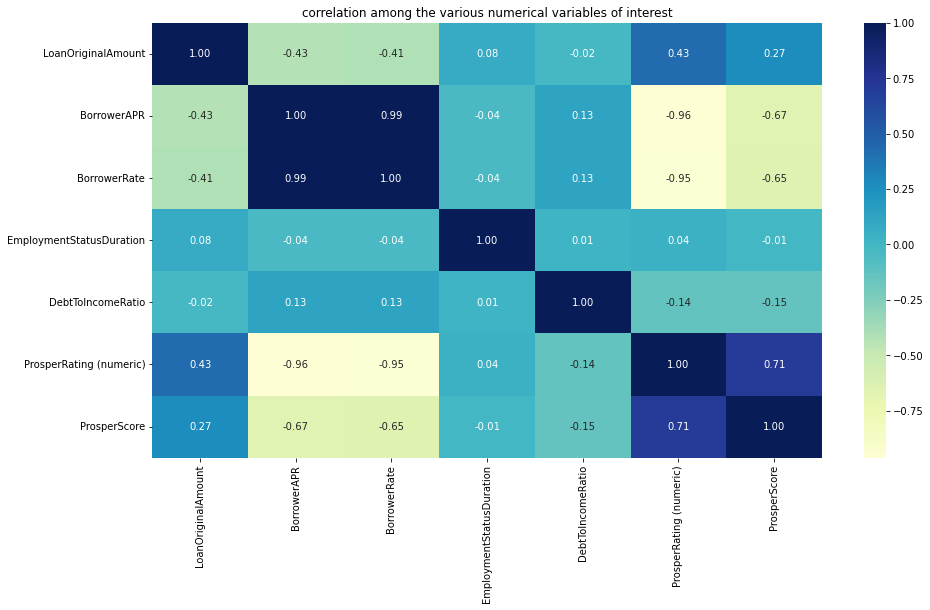

In [46]:
# let's get the correlation plot of the numerical variables using heatmap
plt.figure(figsize = [15,8])
sb.heatmap(loan_data[num_var].corr(), annot = True, fmt = '.2f',
           cmap="YlGnBu", center = 0)
plt.title("correlation among the various numerical variables of interest") 
plt.show()

### from the correlation heat map, we can detect certain relationship

> borrower rate and borrower APR shows strong positive correlation

> borrower rate and Prosper rating shows strong negative correlation

> prosper rating and loan amount shows slightly strong positive correlation

> Borrower APR and ProsperScore shows moderately strong negative correlation

> Borrower Rate and ProsperScore shows moderately strong negative correlation

> ProsperRating and ProsperScore shows strong positive correlation

### Relationship among numerical and categorical features

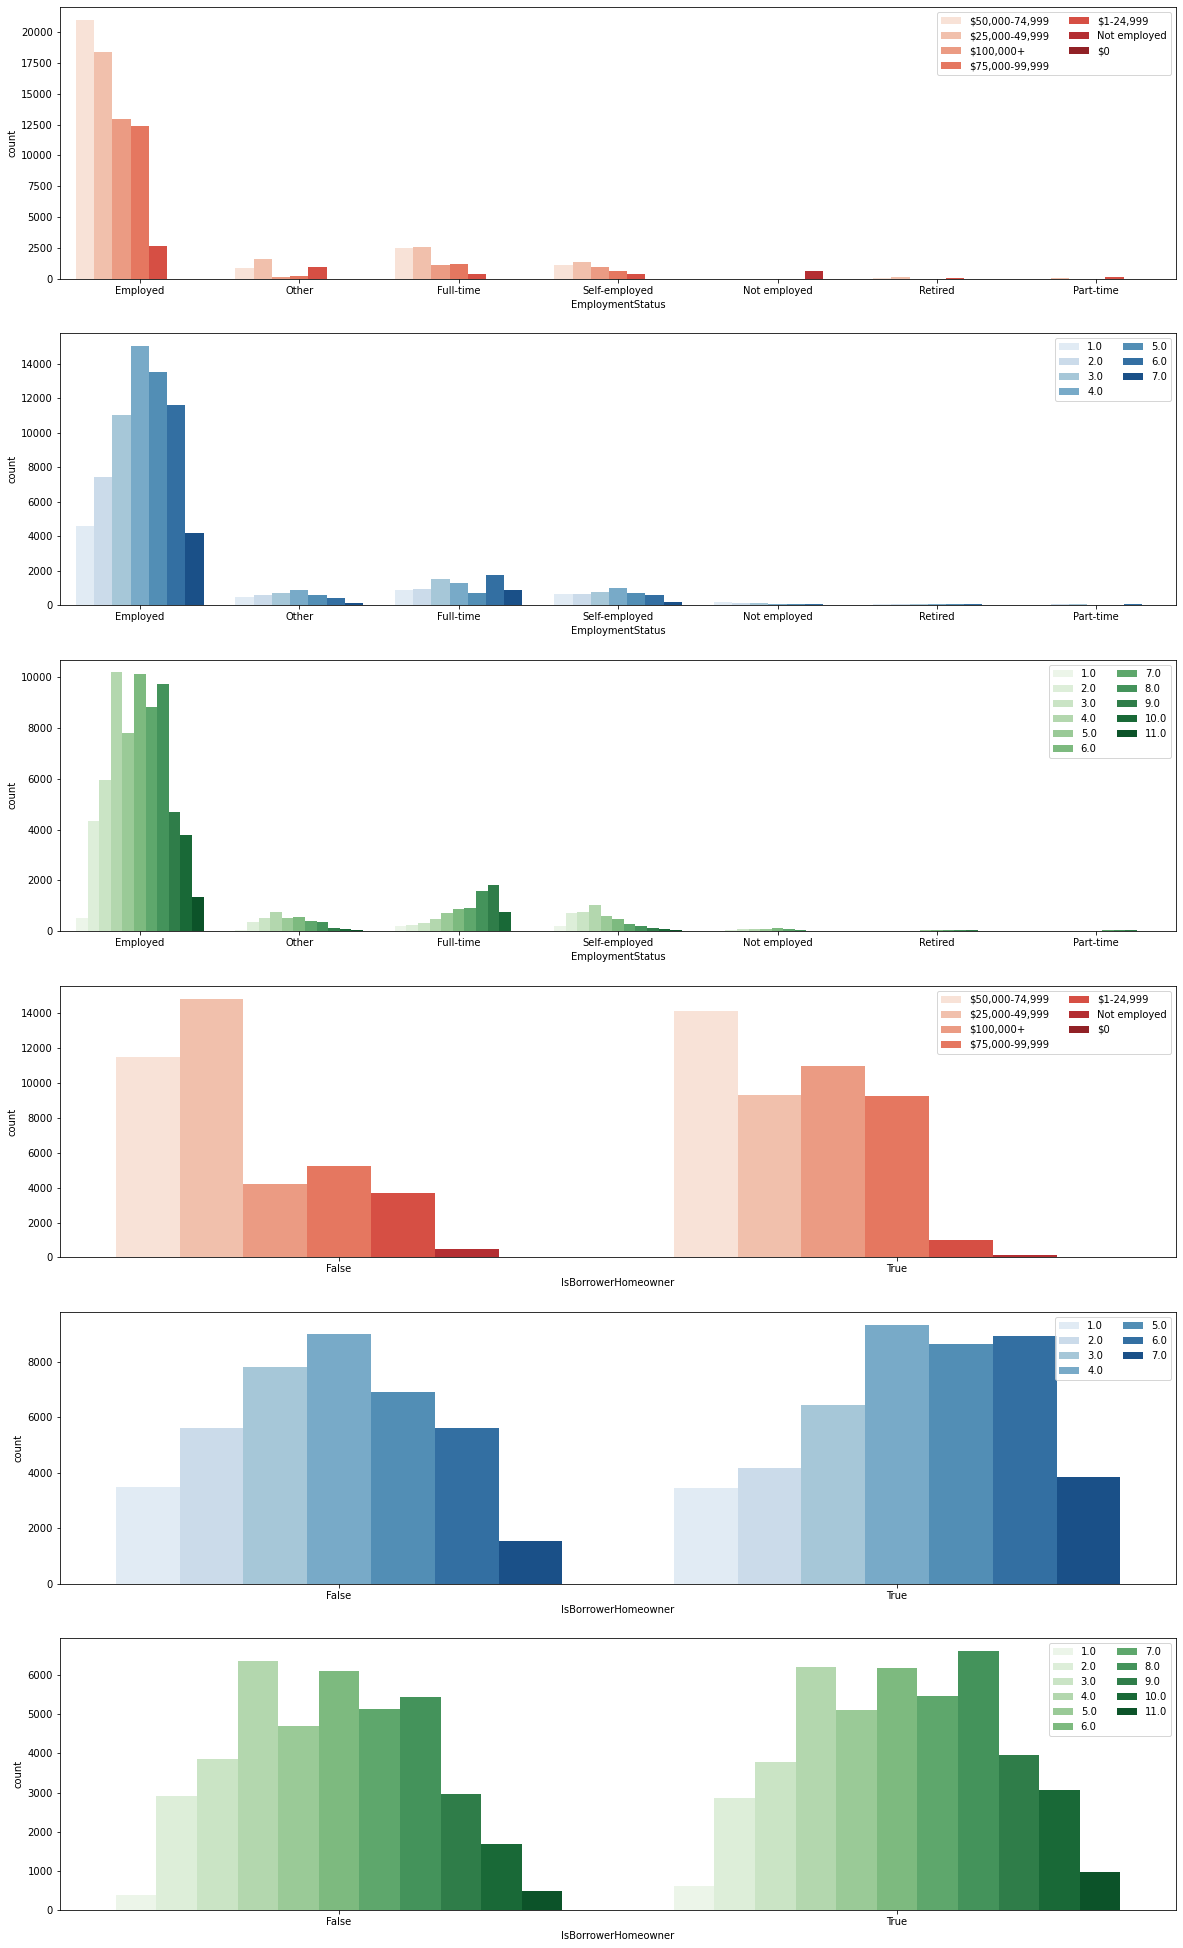

In [47]:
#Relationship between some of the categorical and numerical variables of interest. 
plt.figure(figsize = [20, 35])

# subplot 1: EmploymentStatus vs IncomeRange
ax = plt.subplot(6, 1, 1)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds')
ax.legend(loc = 1, ncol = 2)

# subplot 2: EmploymentStatus vs. ProsperRating (numeric)
ax = plt.subplot(6, 1, 2)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'ProsperRating (numeric)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2)

# subplot 3: EmploymentStatus vs. ProsperScore
ax = plt.subplot(6, 1, 3)
sb.countplot(data = loan_data, x = 'EmploymentStatus', hue = 'ProsperScore', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: sBorrowerHomeowner vs. IncomeRange
ax = plt.subplot(6, 1, 4)
sb.countplot(data = loan_data, x = 'IsBorrowerHomeowner', hue = 'IncomeRange', palette = 'Reds')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: IsBorrowerHomeowner vs. ProsperRating (numeric)
ax = plt.subplot(6, 1, 5)
sb.countplot(data = loan_data, x = 'IsBorrowerHomeowner', hue = 'ProsperRating (numeric)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: IsBorrowerHomeowner vs. ProsperScore
ax = plt.subplot(6, 1, 6)
sb.countplot(data = loan_data, x = 'IsBorrowerHomeowner', hue = 'ProsperScore', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

> The employed and middle class earners dominate the survey. Same findings were noted also for homeowners.

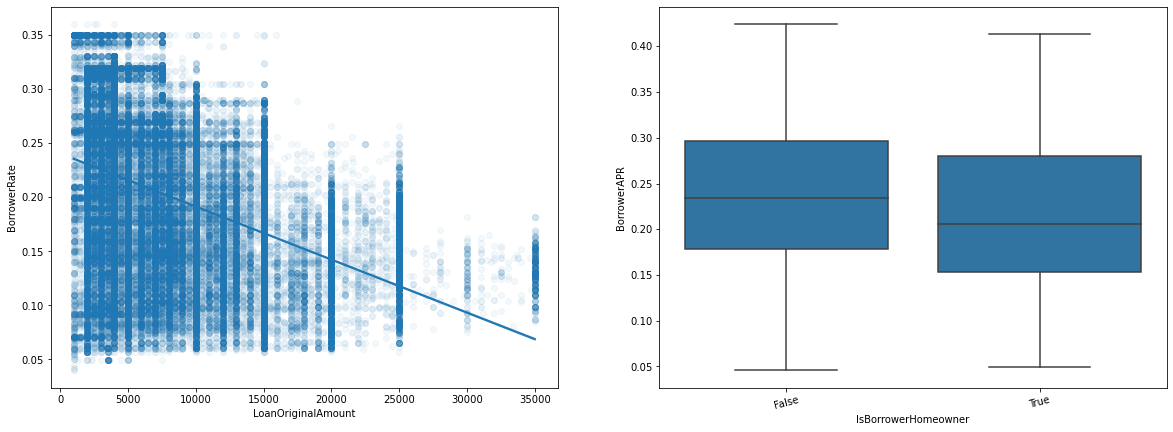

In [48]:
plt.figure(figsize = [20,7])
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.regplot(data = loan_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':1/20});
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate')

plt.subplot(1,2,2)
sb.boxplot(data=loan_data, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15);

> Negative correlation was noted for BorrowerRate and LoanOriginalAmount. Homeowners have a relatively lower median BorrowerAPR compared to non-homeowners.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The employed, middle class earners and homeowners dominated the survey with some strong correlation noted around some of the numeric variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

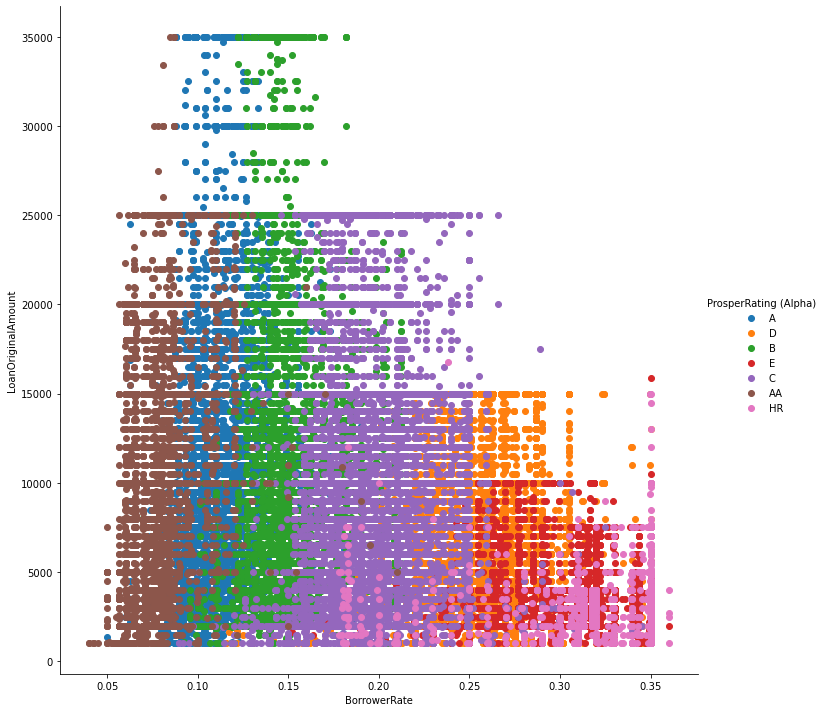

In [49]:
g = sb.FacetGrid(data =loan_data, hue = 'ProsperRating (Alpha)', height = 10)
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount')
g.add_legend();

> Prosper rating AA which is the best rating is closly associated with low borrower rate between 0.05 and 0.10 while 25000 above loan original amount is associated with AA, A,B

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The lower borrower rate is associated with higher prosper rating, while the top loan orignal amount was majorly associated with the top prosper rating and lower borrower rate

### Were there any interesting or surprising interactions between features?

> No

## Conclusions
>__This project was centered around loan amount for each listing and their respective prosper rating using visualisation from the different python library for both exploratory and explanatory analysis.__

> __Some wrangling efforts were made to put the dataset in a form suitable for visualization. Initially, there were 113937 loan   
 records with 81 features in the dataset, of which only 84853 records was considered for this analysis because of their   
 relevance in determining the amount of loan to be collected and prosper rating.__

> _The following insights were drawn from the analysis;_

> 1. Retired, Partime and Not-employed had relatively low number of loan listing compared to employed and full time workers

> 2. majority of the listing are coming from Carlifonia,New York,Texas, Florida with Washington, D.C topping the average loan 
  amount recorded

> 3. high income earners constitute majority in the loan listing with 100,000+ dollars topping the average loan original amount 
 as expected

> 4. The year 2013 recorded the highest loan listing with 2014 topping the chart for average loan amount requested for.

> 5. Majority of the listing and average loan requested for was for debt consolidation.

> 6. More than half of the borrower were home owners and this set of people also topped the average loan original amount

> 7. Highest percentage of the loan listing was carried out in the 4th quarter, followed by the 1st quarter

> 8. There were lot of loan listing on the low LoanOriginalAmount end and few on the high LoanOriginalAmount end.

> 9. borrower rate and borrower APR showed strong positive correlation

> 10. The employed, middle class earners and homeowners dominated the survey

> 11. Prosper rating AA which is the best rating is closly associated with low borrower rate between 0.05 and 0.10 while 25000 
  above loan original amount is associated with AA, A,B